In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

import json
import folium
from folium import plugins

geo_path = 'data/seoul_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

# 대여이력 정보 가져오기

In [2]:
df = pd.read_csv('data/서울특별시 공공자전거 대여이력 정보_2018년_1분기1.csv', encoding='cp949')
df.head()

,'자전거번호','대여일시','대여대여소번호','대여대여소명','대여거치대','반납일시','반납대여소번호','반납대여소명','반납거치대','이용시간(분)','이용거리(M)'
0,'SPB-02041','2018-01-01 00:00:10','227',' 양평2나들목 보행통로 입구',9,'2018-01-01 00:04:03','227',' 양평2나들목 보행통로 입구',9,3,50
1,'SPB-03796','2018-01-01 00:00:42','2219',"' 고속터미널역 8-1번, 8-2번 출구 사이'",15,'2018-01-01 00:25:41','3511',' 응봉역 1번출구',9,24,7670
2,'SPB-02402','2018-01-01 00:00:58','567',' 성수역 2번출구 앞',13,'2018-01-01 00:09:33','3506',' 영동대교 북단',2,8,1390
3,'SPB-01564','2018-01-01 00:01:02','568',' 청계8가사거리 부근',5,'2018-01-01 00:10:13','521',' 왕십리역 11번 출구 앞',9,8,1820
4,'SPB-05713','2018-01-01 00:01:03','361',' 동묘앞역 1번출구 뒤',4,'2018-01-01 00:06:18','383',' 신당역 12번 출구 뒤',8,4,850


In [3]:
#칼럼에 있는 '를 제거
df.columns=df.columns.str.strip("'")

# 불필요하게 '가 들어가 있다. 스트링 타입으로 되어있는 데이터에서 '을 제거하자.
df = df.apply(lambda x: x.str.strip("'") if x.dtype == np.dtype('object') else x)

#대여대여소명과 반납대여소명 양쪽 공백 제거
df=df.apply(lambda x: x.str.strip(" ") if x.dtype == np.dtype('object') else x)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784734 entries, 0 to 784733
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   자전거번호    784734 non-null  object
 1   대여일시     784734 non-null  object
 2   대여대여소번호  784734 non-null  object
 3   대여대여소명   784734 non-null  object
 4   대여거치대    784734 non-null  int64 
 5   반납일시     784734 non-null  object
 6   반납대여소번호  784734 non-null  object
 7   반납대여소명   784734 non-null  object
 8   반납거치대    784734 non-null  int64 
 9   이용시간(분)  784734 non-null  int64 
 10  이용거리(M)  784734 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 65.9+ MB


In [5]:
#결측치 보기
df.isnull().sum()

자전거번호      0
대여일시       0
대여대여소번호    0
대여대여소명     0
대여거치대      0
반납일시       0
반납대여소번호    0
반납대여소명     0
반납거치대      0
이용시간(분)    0
이용거리(M)    0
dtype: int64

In [6]:
df['대여일시']=pd.to_datetime(df['대여일시'])
df['반납일시']=pd.to_datetime(df['반납일시'])
df.dtypes

자전거번호              object
대여일시       datetime64[ns]
대여대여소번호            object
대여대여소명             object
대여거치대               int64
반납일시       datetime64[ns]
반납대여소번호            object
반납대여소명             object
반납거치대               int64
이용시간(분)             int64
이용거리(M)             int64
dtype: object

In [7]:
df['대여년'] = df['대여일시'].dt.year
df['대여월'] = df['대여일시'].dt.month
df['대여일'] = df['대여일시'].dt.day
df['대여시'] = df['대여일시'].dt.hour
#df['대여분'] = df['대여일시'].dt.minute
df['대여요일'] = df['대여일시'].dt.dayofweek
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)', '대여년', '대여월', '대여일', '대여시',
       '대여요일'],
      dtype='object')

In [8]:
df['반납년'] = df['반납일시'].dt.year
df['반납월'] = df['반납일시'].dt.month
df['반납일'] = df['반납일시'].dt.day
df['반납시'] = df['반납일시'].dt.hour
#df['반납분'] = df['반납일시'].dt.minute
df['반납요일'] = df['반납일시'].dt.dayofweek
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)', '대여년', '대여월', '대여일', '대여시',
       '대여요일', '반납년', '반납월', '반납일', '반납시', '반납요일'],
      dtype='object')

In [9]:
#필요없는 속성 제거
df.drop(['자전거번호','대여일시','반납일시'],axis=1,inplace=True)

# 대여소 정보 가져오기

In [10]:
stations = pd.read_csv('data/대여소 정보.csv')
stations.head()

,대여소 번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영 방식
0,1695,월계미륭아파트 정문,노원구,노원구 월계동 14,37.623417,127.066933,2020-06-17,NaN,10.0,QR
1,2301,현대고등학교 건너편,강남구,서울특별시 강남구 압구정로 134,37.524071,127.021790,2017-06-13,10.0,NaN,LCD
2,2302,교보타워 버스정류장(신논현역 3번출구 후면),강남구,서울특별시 강남구 봉은사로 지하 102,37.505581,127.024277,2017-06-13,10.0,NaN,LCD
3,2303,논현역 7번출구,강남구,서울특별시 강남구 학동로 지하 102,37.511517,127.021477,2017-06-13,15.0,NaN,LCD
4,2304,신영 ROYAL PALACE 앞,강남구,서울특별시 강남구 언주로 626,37.512527,127.035835,2017-06-13,10.0,NaN,LCD


In [11]:
#필요없는 속성 제거
stations.drop(['보관소(대여소)명','상세주소','설치시기','LCD','QR','운영 방식'],axis=1,inplace=True)
stations

,대여소 번호,자치구,위도,경도
0,1695,노원구,37.623417,127.066933
1,2301,강남구,37.524071,127.021790
2,2302,강남구,37.505581,127.024277
3,2303,강남구,37.511517,127.021477
4,2304,강남구,37.512527,127.035835
...,...,...,...,...
2078,2547,서초구,37.519047,127.012283
2079,1573,강북구,37.616665,127.022110
2080,1268,송파구,37.517288,127.114197
2081,1267,송파구,37.514240,127.123070


In [12]:
#stations['대여소 번호']=stations['대여소 번호'].astype(float)
#df['대여대여소번호']=pd.to_numeric(df['대여대여소번호'],errors='coerce')
stations['대여소 번호']=stations['대여소 번호'].astype(str)
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083 entries, 0 to 2082
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소 번호  2083 non-null   object 
 1   자치구     2083 non-null   object 
 2   위도      2083 non-null   float64
 3   경도      2083 non-null   float64
dtypes: float64(2), object(2)
memory usage: 65.2+ KB


In [13]:
df_stations=df.merge(stations, left_on="대여대여소번호",right_on="대여소 번호",how="left").drop(columns='대여소 번호')
#df_stations.drop(['대여소 번호'],axis=1,inplace=True)
df_stations.rename(columns={
    "자치구": "대여 지역",
    "위도": "대여대여소 위도",
    "경도": "대여대여소 경도"
}, inplace=True)
df_stations.head()
df_stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786311 entries, 0 to 786310
Data columns (total 21 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   대여대여소번호   786311 non-null  object 
 1   대여대여소명    786311 non-null  object 
 2   대여거치대     786311 non-null  int64  
 3   반납대여소번호   786311 non-null  object 
 4   반납대여소명    786311 non-null  object 
 5   반납거치대     786311 non-null  int64  
 6   이용시간(분)   786311 non-null  int64  
 7   이용거리(M)   786311 non-null  int64  
 8   대여년       786311 non-null  int64  
 9   대여월       786311 non-null  int64  
 10  대여일       786311 non-null  int64  
 11  대여시       786311 non-null  int64  
 12  대여요일      786311 non-null  int64  
 13  반납년       786311 non-null  int64  
 14  반납월       786311 non-null  int64  
 15  반납일       786311 non-null  int64  
 16  반납시       786311 non-null  int64  
 17  반납요일      786311 non-null  int64  
 18  대여 지역     773552 non-null  object 
 19  대여대여소 위도  773552 non-null  float64
 20  대여대여

In [14]:
df_stations=df_stations.merge(stations, left_on="반납대여소번호",right_on="대여소 번호",how="left").drop(columns='대여소 번호')
df_stations.rename(columns={
    "자치구": "반납 지역",
    "위도": "반납대여소 위도",
    "경도": "반납대여소 경도"
}, inplace=True)
df_stations.head()

,대여대여소번호,대여대여소명,대여거치대,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),대여년,대여월,...,반납월,반납일,반납시,반납요일,대여 지역,대여대여소 위도,대여대여소 경도,반납 지역,반납대여소 위도,반납대여소 경도
0,227,양평2나들목 보행통로 입구,9,227,양평2나들목 보행통로 입구,9,3,50,2018,1,...,1,1,0,0,영등포구,37.544666,126.888359,영등포구,37.544666,126.888359
1,2219,"고속터미널역 8-1번, 8-2번 출구 사이",15,3511,응봉역 1번출구,9,24,7670,2018,1,...,1,1,0,0,서초구,37.506199,127.003944,성동구,37.551250,127.035103
2,567,성수역 2번출구 앞,13,3506,영동대교 북단,2,8,1390,2018,1,...,1,1,0,0,성동구,37.544590,127.057083,광진구,37.537014,127.061096
3,568,청계8가사거리 부근,5,521,왕십리역 11번 출구 앞,9,8,1820,2018,1,...,1,1,0,0,성동구,37.571102,127.023560,성동구,37.561447,127.034920
4,361,동묘앞역 1번출구 뒤,4,383,신당역 12번 출구 뒤,8,4,850,2018,1,...,1,1,0,0,종로구,37.573242,127.015907,중구,37.565849,127.016403


In [15]:
df_stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788174 entries, 0 to 788173
Data columns (total 24 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   대여대여소번호   788174 non-null  object 
 1   대여대여소명    788174 non-null  object 
 2   대여거치대     788174 non-null  int64  
 3   반납대여소번호   788174 non-null  object 
 4   반납대여소명    788174 non-null  object 
 5   반납거치대     788174 non-null  int64  
 6   이용시간(분)   788174 non-null  int64  
 7   이용거리(M)   788174 non-null  int64  
 8   대여년       788174 non-null  int64  
 9   대여월       788174 non-null  int64  
 10  대여일       788174 non-null  int64  
 11  대여시       788174 non-null  int64  
 12  대여요일      788174 non-null  int64  
 13  반납년       788174 non-null  int64  
 14  반납월       788174 non-null  int64  
 15  반납일       788174 non-null  int64  
 16  반납시       788174 non-null  int64  
 17  반납요일      788174 non-null  int64  
 18  대여 지역     775399 non-null  object 
 19  대여대여소 위도  775399 non-null  float64
 20  대여대여

# 요일별 이용량

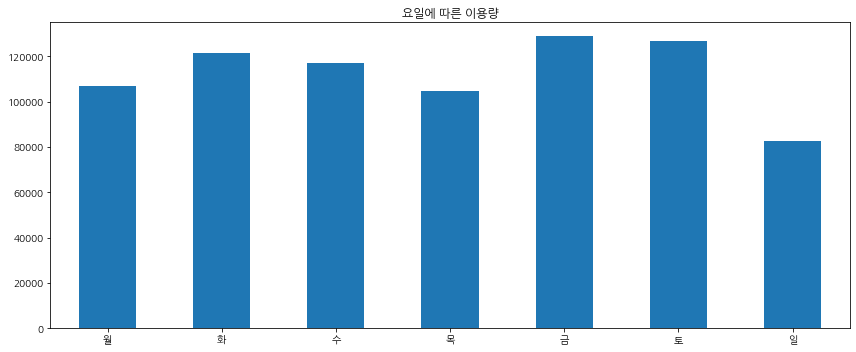

In [16]:
use_by_dayofweek = df_stations.groupby('대여요일').size()
use_by_dayofweek.index = "월 화 수 목 금 토 일".split()
use_by_dayofweek.plot(kind='bar', figsize=(12, 5), rot=0, title="요일에 따른 이용량")
plt.tight_layout()
plt.show()

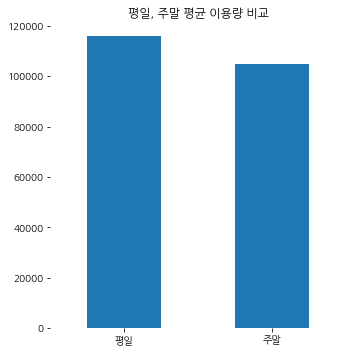

In [17]:
mean_weekday = use_by_dayofweek.loc["월 화 수 목 금".split()].mean()
mean_weekend = use_by_dayofweek.loc["토 일".split()].mean()

pd.Series(data=[
    mean_weekday,
    mean_weekend
], index=["평일", "주말"]).plot(kind='bar', figsize=(5, 5), rot=0, title="평일, 주말 평균 이용량 비교")
plt.box(False)
plt.tight_layout()
plt.show()

In [18]:
diff = (mean_weekday - mean_weekend) / mean_weekday * 100
print("평일이 주말대비 %.1f%% 더 많다." %diff)

평일이 주말대비 9.6% 더 많다.


# 시간별 이용량

### 평일

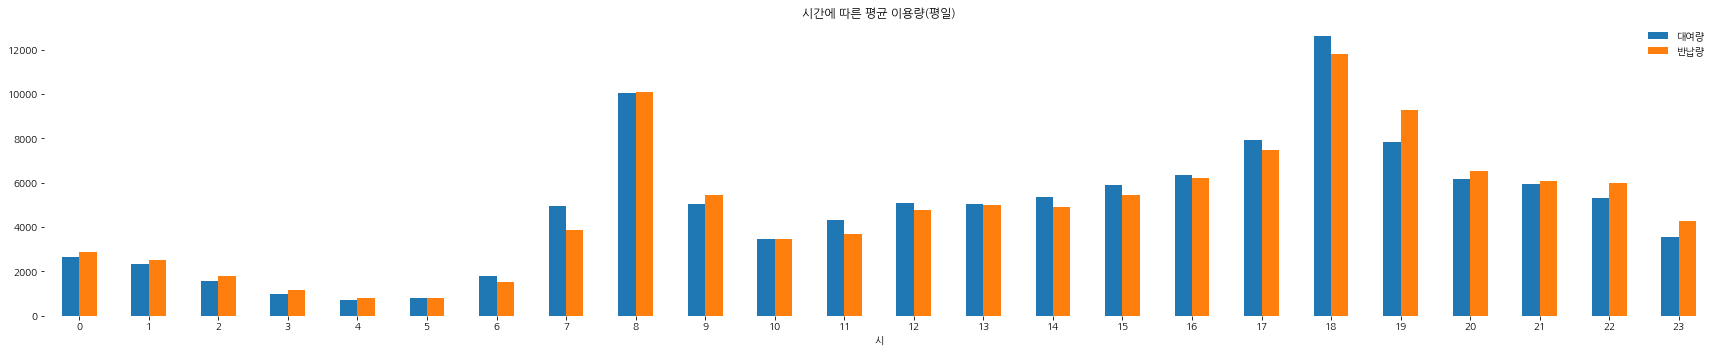

In [19]:
pd.DataFrame(data={
    "대여량": df_stations[df_stations['대여요일'].isin(set(range(0, 5)))].groupby('대여시').size()//5,
    "반납량": df_stations[df_stations['대여요일'].isin(set(range(0, 5)))].groupby('반납시').size()//5
}).plot(kind='bar', figsize=(24, 5), rot=0, title="시간에 따른 평균 이용량(평일)")
plt.xlabel("시")
plt.box(False)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

### 주말

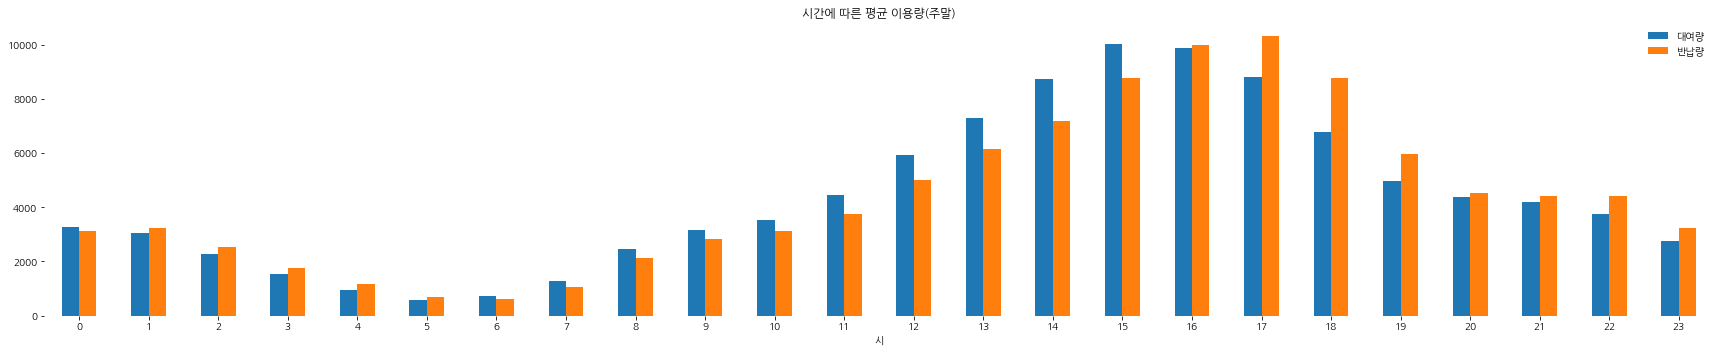

In [20]:
pd.DataFrame(data={
    "대여량": df_stations[df_stations['대여요일'].isin(set(range(5, 7)))].groupby('대여시').size()//2,
    "반납량": df_stations[df_stations['대여요일'].isin(set(range(5, 7)))].groupby('반납시').size()//2
}).plot(kind='bar', figsize=(24, 5), rot=0, title="시간에 따른 평균 이용량(주말)")
plt.xlabel("시")
plt.box(False)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

# 시간에 따른 지역구별 이용량

### 평일 - 대여

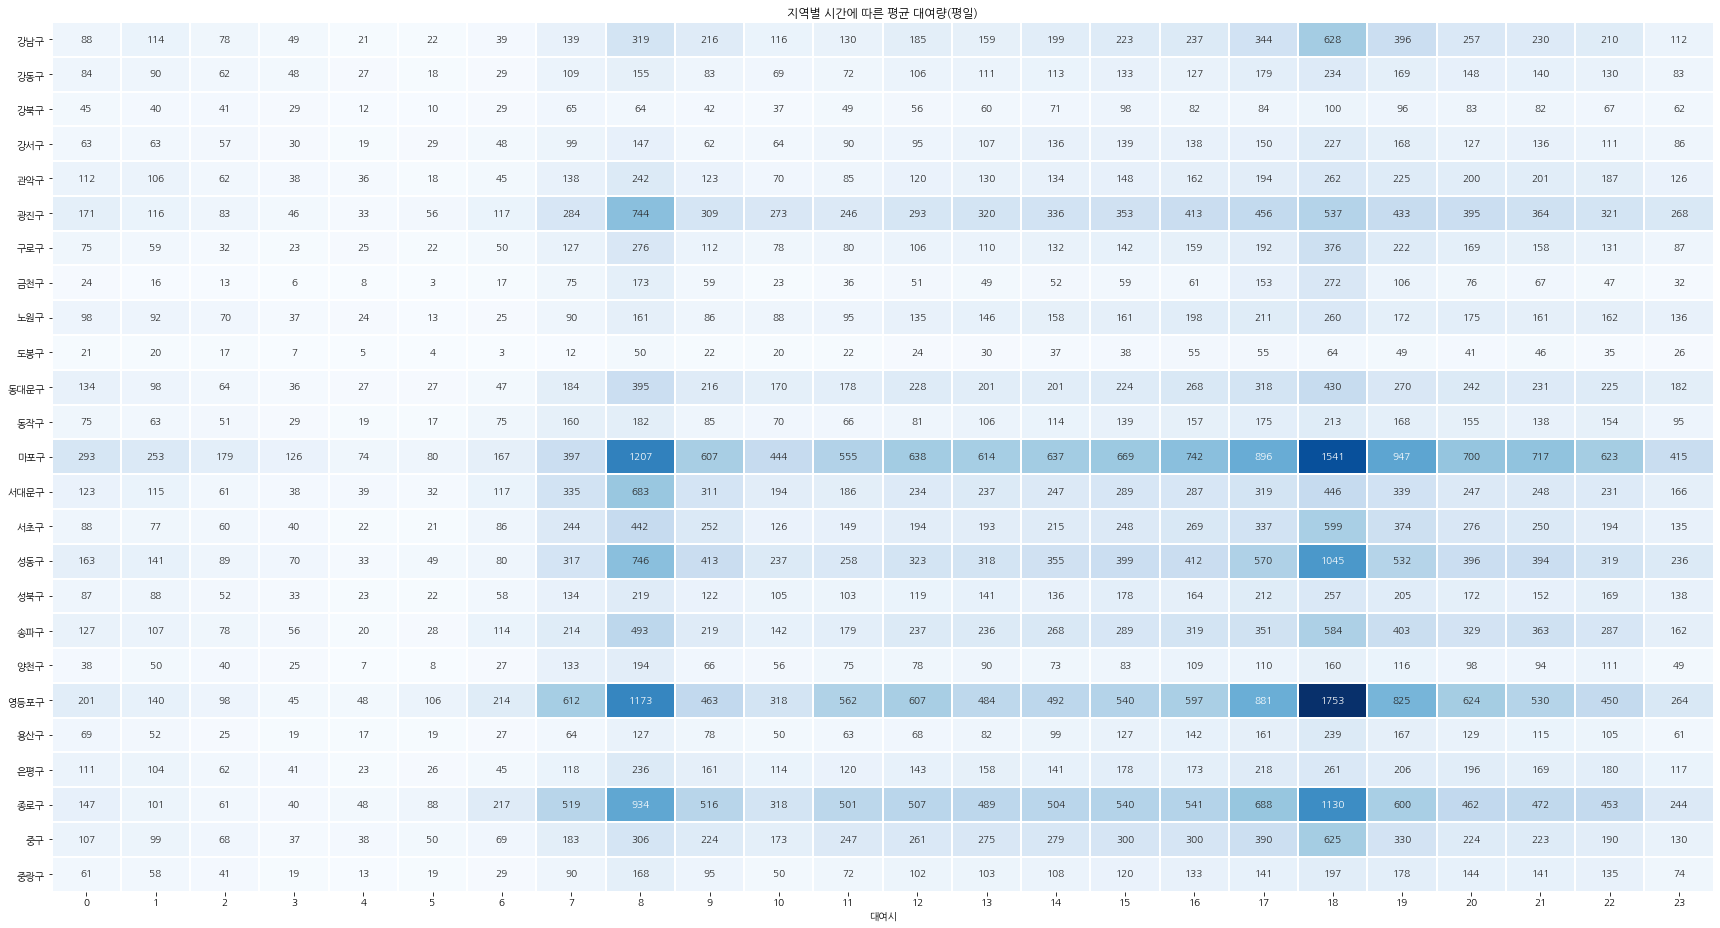

In [21]:
pvt_table = (df_stations[df_stations['대여요일'].isin(set(range(0, 5)))].groupby(['대여 지역', '대여시']).size()//5).unstack()

plt.figure(figsize=(24, 13))
sns.heatmap(pvt_table, annot=True, fmt='d', cmap="Blues", cbar=False, linewidth=1)
plt.title("지역별 시간에 따른 평균 대여량(평일)")
plt.ylabel("")
plt.tight_layout()
plt.show()

### 평일 - 반납

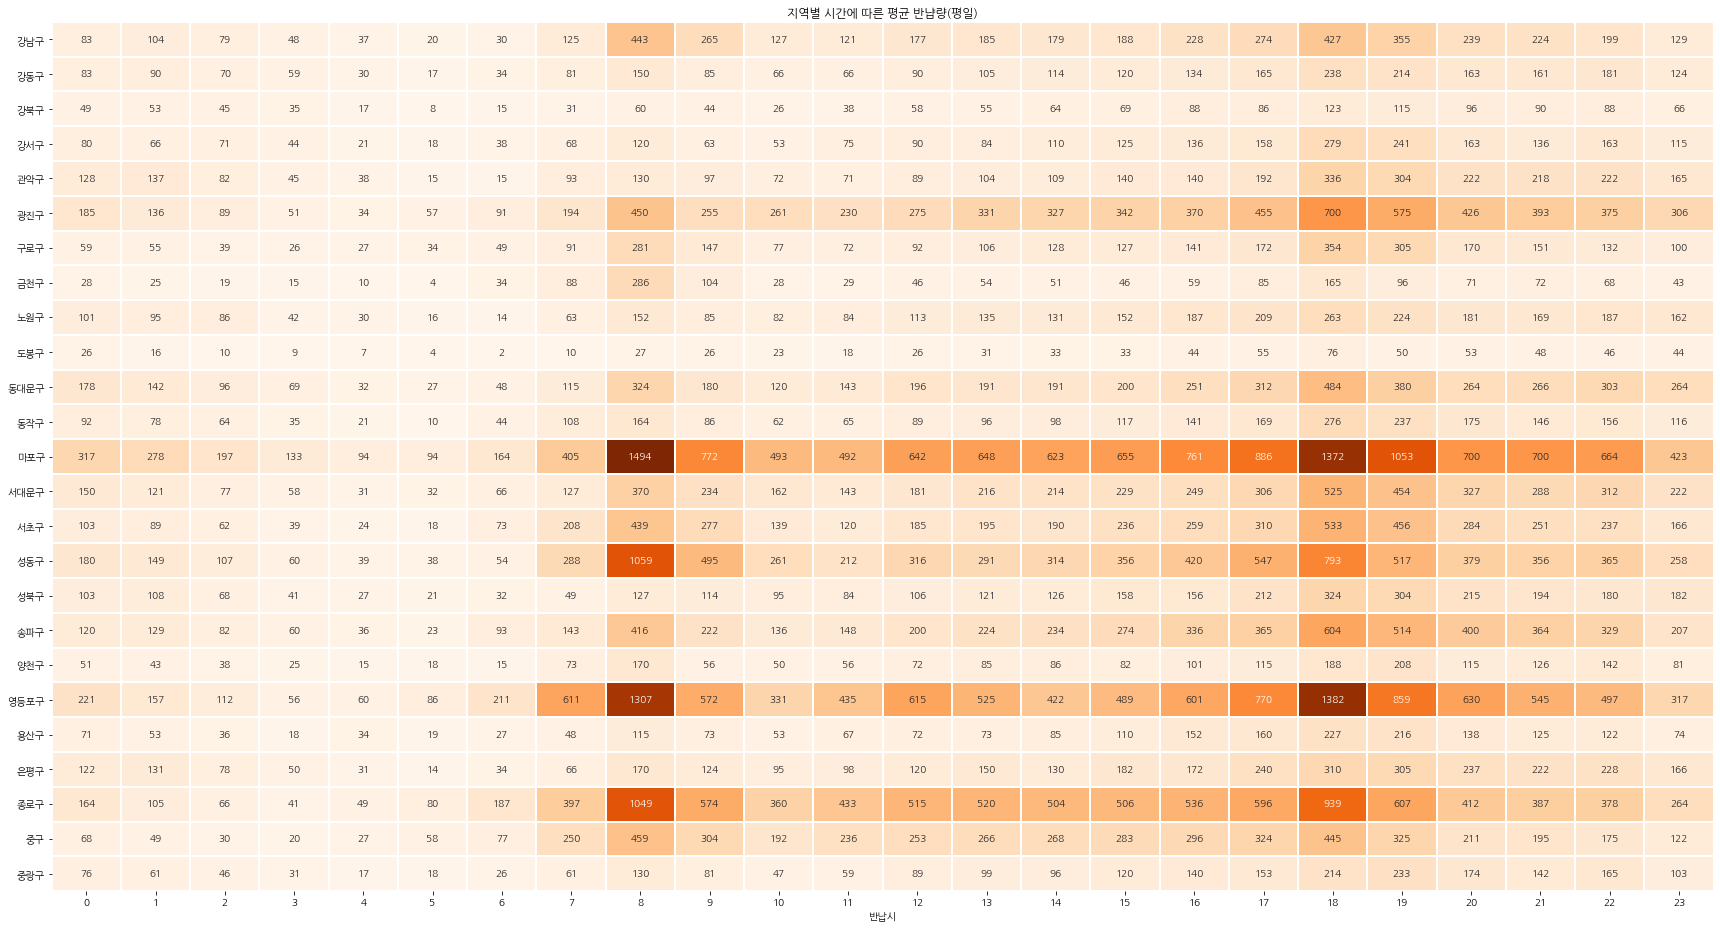

In [22]:
pvt_table = (df_stations[df_stations['대여요일'].isin(set(range(0, 5)))].groupby(['반납 지역', '반납시']).size()//5).unstack()

plt.figure(figsize=(24, 13))
sns.heatmap(pvt_table, annot=True, fmt='d', cmap="Oranges", cbar=False, linewidth=1)
plt.title("지역별 시간에 따른 평균 반냡량(평일)")
plt.ylabel("")
plt.tight_layout()
plt.show()

### 주말 - 대여

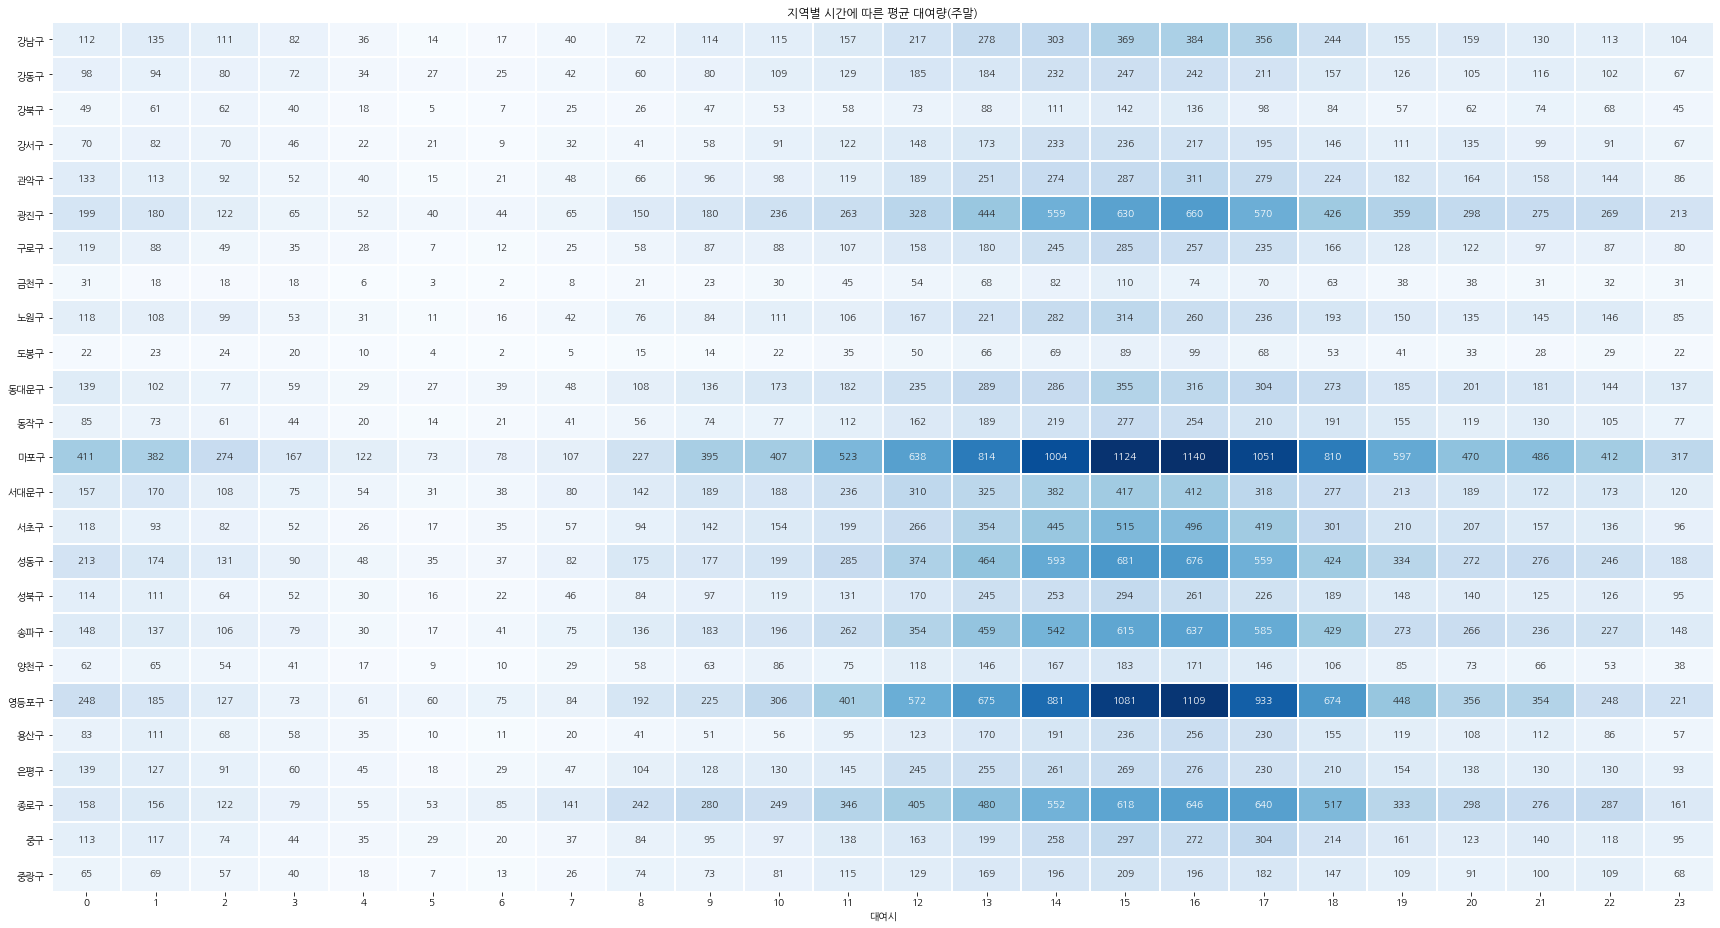

In [23]:
pvt_table = (df_stations[df_stations['대여요일'].isin(set(range(5, 7)))].groupby(['대여 지역', '대여시']).size()//2).unstack()

plt.figure(figsize=(24, 13))
sns.heatmap(pvt_table, annot=True, fmt='d', cmap="Blues", cbar=False, linewidth=1)
plt.title("지역별 시간에 따른 평균 대여량(주말)")
plt.ylabel("")
plt.tight_layout()
plt.show()

### 주말 - 반납

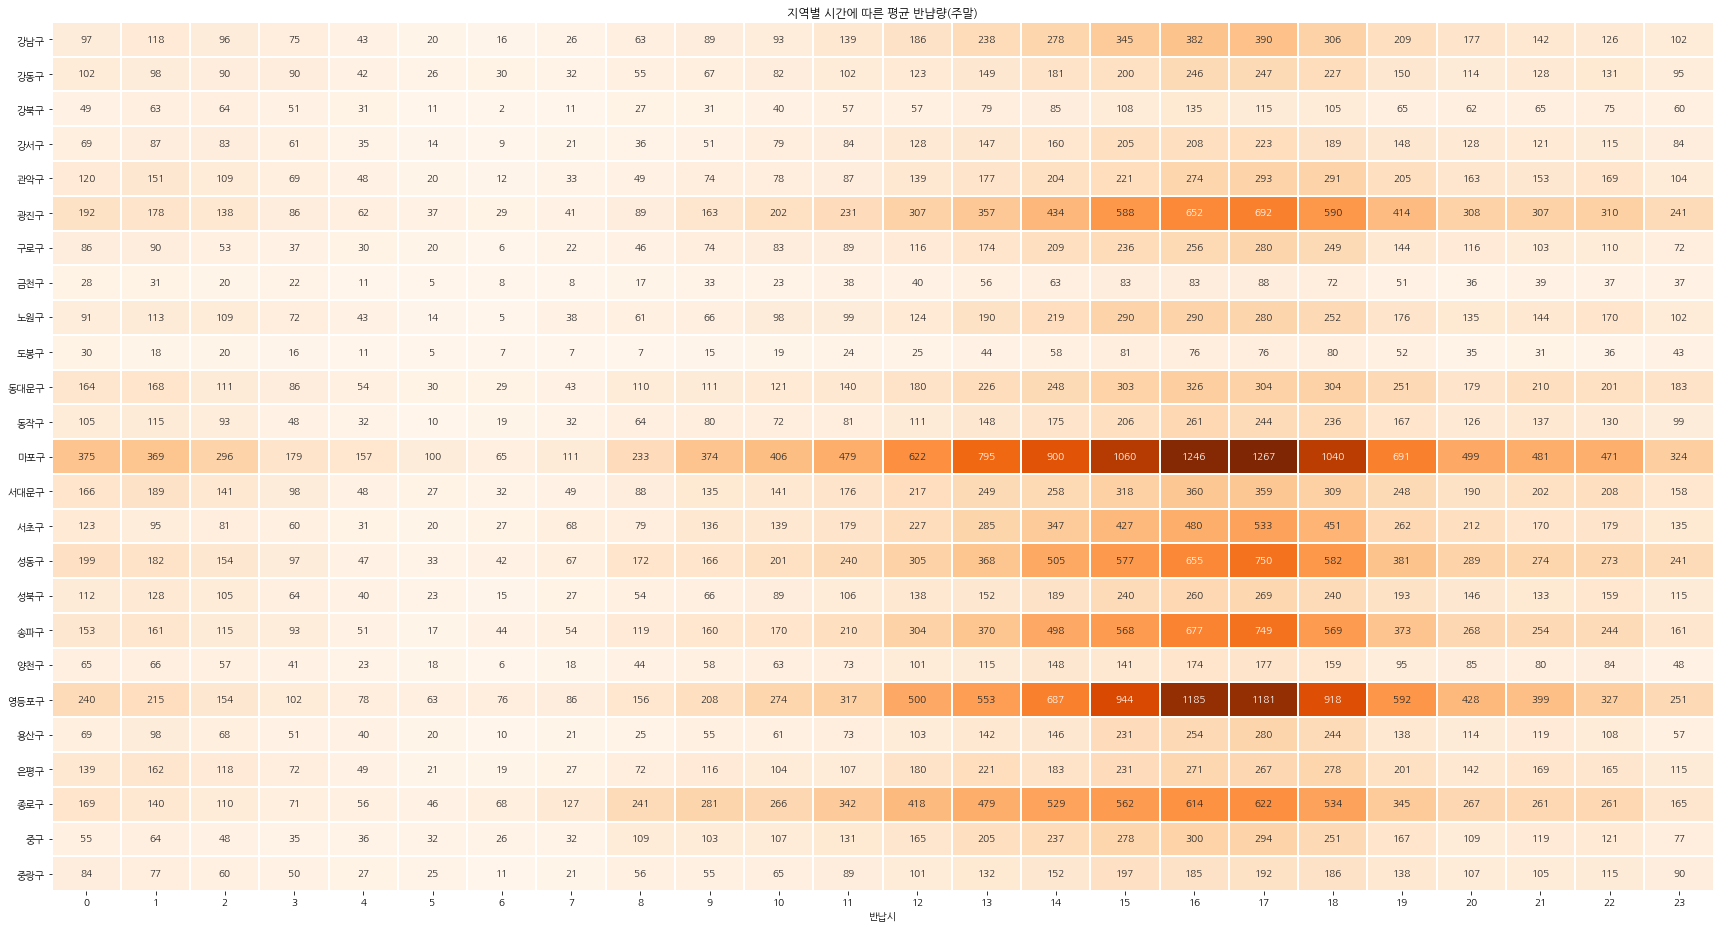

In [24]:
pvt_table = (df_stations[df_stations['대여요일'].isin(set(range(5, 7)))].groupby(['반납 지역', '반납시']).size()//2).unstack()

plt.figure(figsize=(24, 13))
sns.heatmap(pvt_table, annot=True, fmt='d', cmap="Oranges", cbar=False, linewidth=1)
plt.title("지역별 시간에 따른 평균 반냡량(주말)")
plt.ylabel("")
plt.tight_layout()
plt.show()

# 평일 출퇴근 시간에 이용량의 대여 혹은 반납이 집중되는 지역은?

### 출/퇴근 시간의 피크인 오전 8시와 오후 6시만 가져옴

In [25]:
pvt_table = (df_stations[df_stations['대여요일'].isin(set(range(0, 5)))].groupby(['대여 지역', '대여시']).size()//5)
rent = pd.DataFrame([pvt_table.xs(8,level=1), pvt_table.xs(18,level=1)], index=[8, 18])

pvt_table = (df_stations[df_stations['대여요일'].isin(set(range(0, 5)))].groupby(['반납 지역', '반납시']).size()//5)
ret = pd.DataFrame([pvt_table.xs(8,level=1), pvt_table.xs(18,level=1)], index=[8, 18])

In [26]:
total = rent+ret
rent = rent / total
ret = ret / total

In [27]:
morning_diff = pd.DataFrame([rent.T[8], ret.T[8]], index=['대여', '반납']).T.sort_values('대여')
dinner_diff = pd.DataFrame([rent.T[18], ret.T[18]], index=['대여', '반납']).T.sort_values('대여')

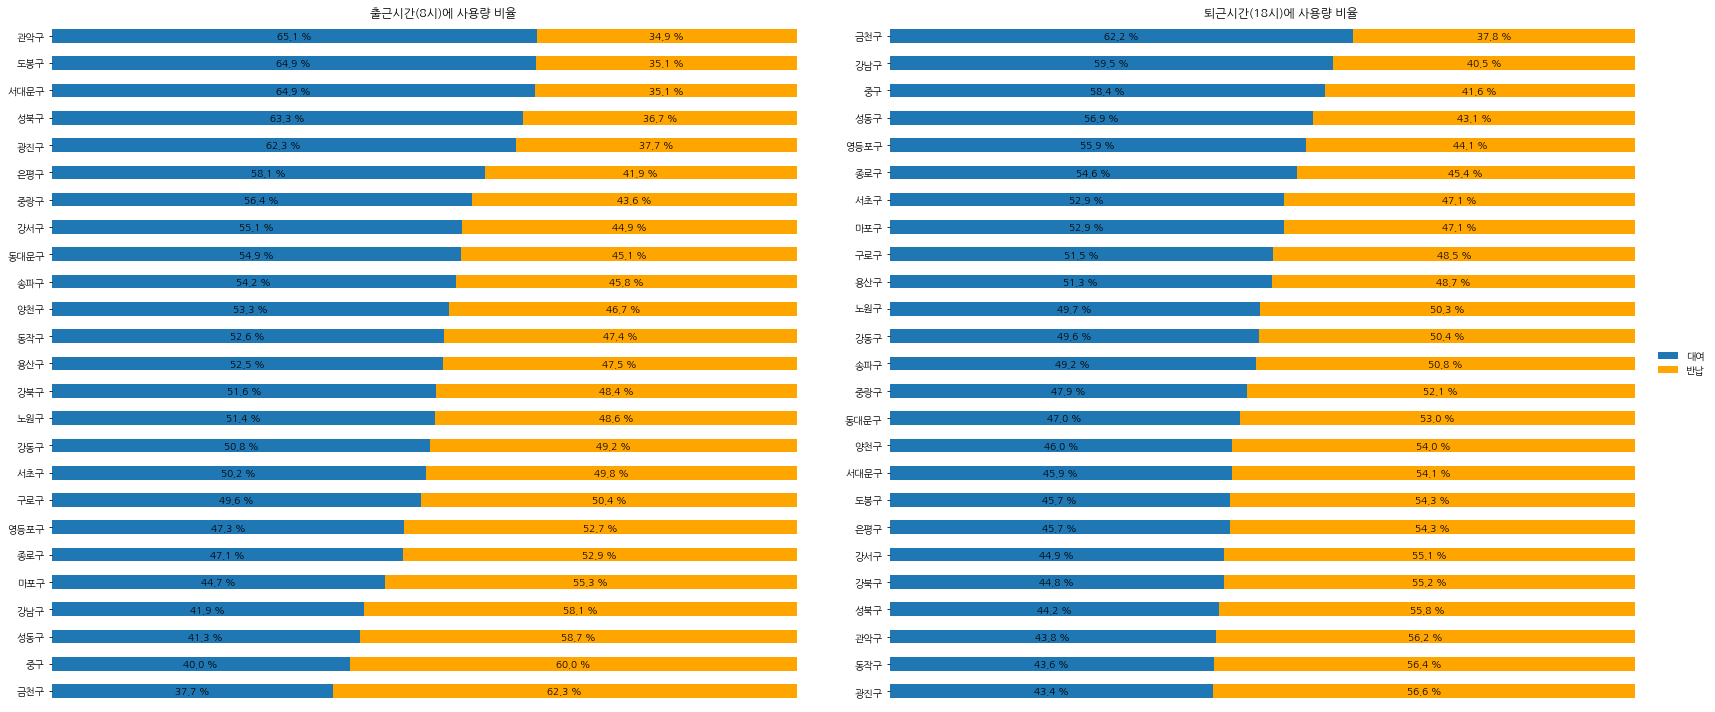

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

for i, (diff, time_name) in enumerate(zip([morning_diff, dinner_diff], ["출근시간(8시)", "퇴근시간(18시)"])):
    ax = diff.plot(kind='barh', color=['C0', 'orange'], stacked=True, title="%s에 사용량 비율"%time_name, ax=axes[i])

    for p in ax.patches: 
        left, bottom, width, height = p.get_bbox().bounds 
        ax.annotate("%.1f %%"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')

    plt.sca(ax)
    plt.xticks([])
    plt.box(False)
axes[0].get_legend().remove()
plt.legend(loc='center left', bbox_to_anchor=(0.97, 0.5), frameon=False)
plt.tight_layout()
plt.show()

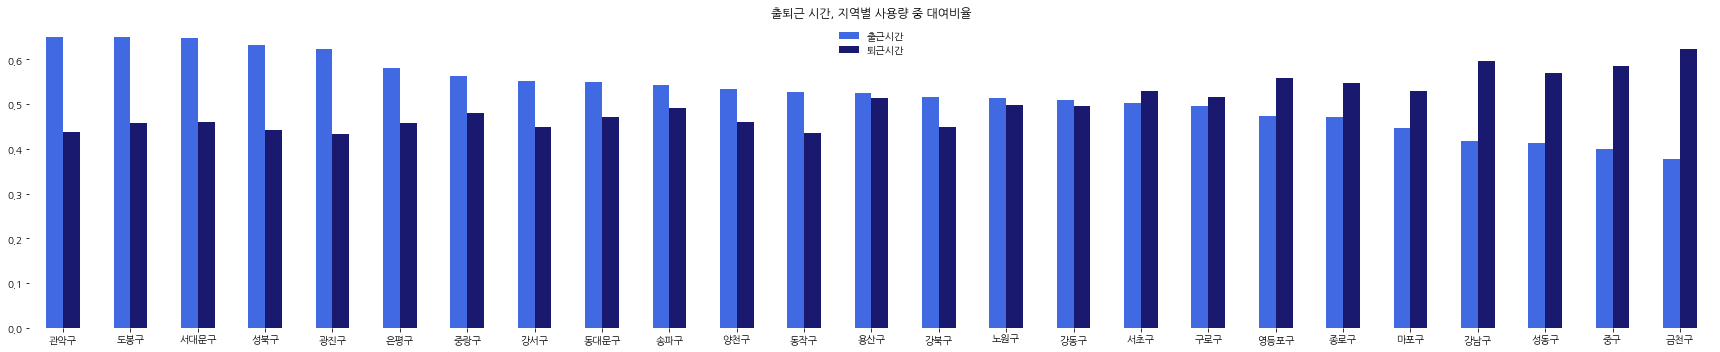

In [29]:
morning_dinner_diff = pd.DataFrame([morning_diff['대여'], dinner_diff['대여']], index=['출근시간', '퇴근시간']).T
morning_dinner_diff.sort_values('출근시간', inplace=True, ascending=False)

morning_dinner_diff.plot(kind='bar', figsize=(24, 5), title="출퇴근 시간, 지역별 사용량 중 대여비율", rot=0, color=['royalblue', 'midnightblue'])
plt.box(False)
plt.tight_layout()
plt.legend(frameon=False)
plt.show()

# 요일별로 이용량이 높은 지역은 고정되어 있나?

In [30]:
use_by_region = df_stations.pivot_table(index='대여 지역', columns='대여요일', aggfunc='size') + \
                df_stations.pivot_table(index='반납 지역', columns='대여요일', aggfunc='size')
use_by_region_rank = use_by_region.rank(ascending=False)
use_by_region_rank.sort_values(0, inplace=True)
use_by_region_rank.T

대여 지역,마포구,영등포구,종로구,성동구,광진구,송파구,서대문구,중구,서초구,동대문구,...,노원구,동작구,강동구,강서구,중랑구,용산구,양천구,금천구,강북구,도봉구
대여요일,,,,,,,,,,,,,,,,,,,,,
0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0
1,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0
2,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,15.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0
3,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,14.0,19.0,17.0,18.0,20.0,21.0,22.0,24.0,23.0,25.0
4,1.0,2.0,3.0,4.0,5.0,6.0,7.0,9.0,8.0,10.0,...,15.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0
5,1.0,2.0,3.0,4.0,5.0,6.0,8.0,13.0,7.0,9.0,...,14.0,17.0,16.0,20.0,21.0,19.0,22.0,24.0,23.0,25.0
6,1.0,2.0,3.0,5.0,4.0,6.0,7.0,15.0,8.0,9.0,...,12.0,17.0,16.0,19.0,20.0,21.0,22.0,24.0,23.0,25.0


# 요일에 따른 지역별 사용량 순위

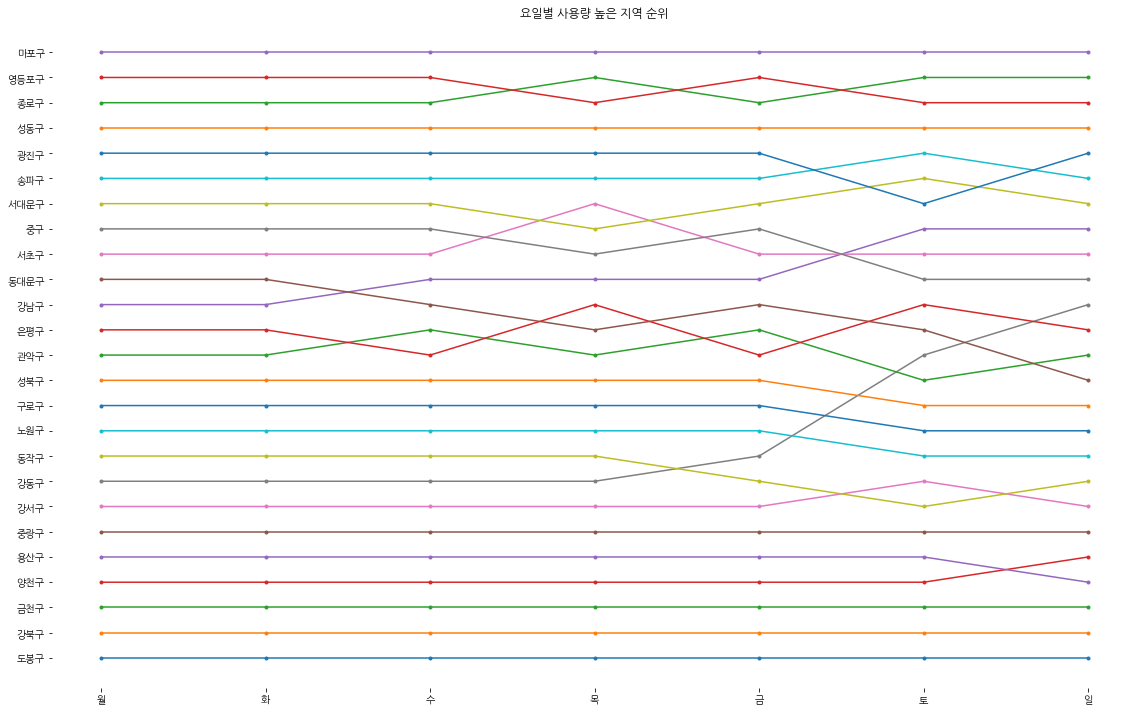

In [31]:
yticks = list(use_by_region_rank.index)

use_by_region_rank.T.plot(style='.-', figsize=(16, 10), legend=False, title="요일별 사용량 높은 지역 순위")
plt.yticks(range(1, len(yticks)+1), reversed(yticks))
plt.xticks(range(7), "월 화 수 목 금 토 일".split())
plt.xlabel("")
plt.box(False)
plt.tight_layout()
plt.show()

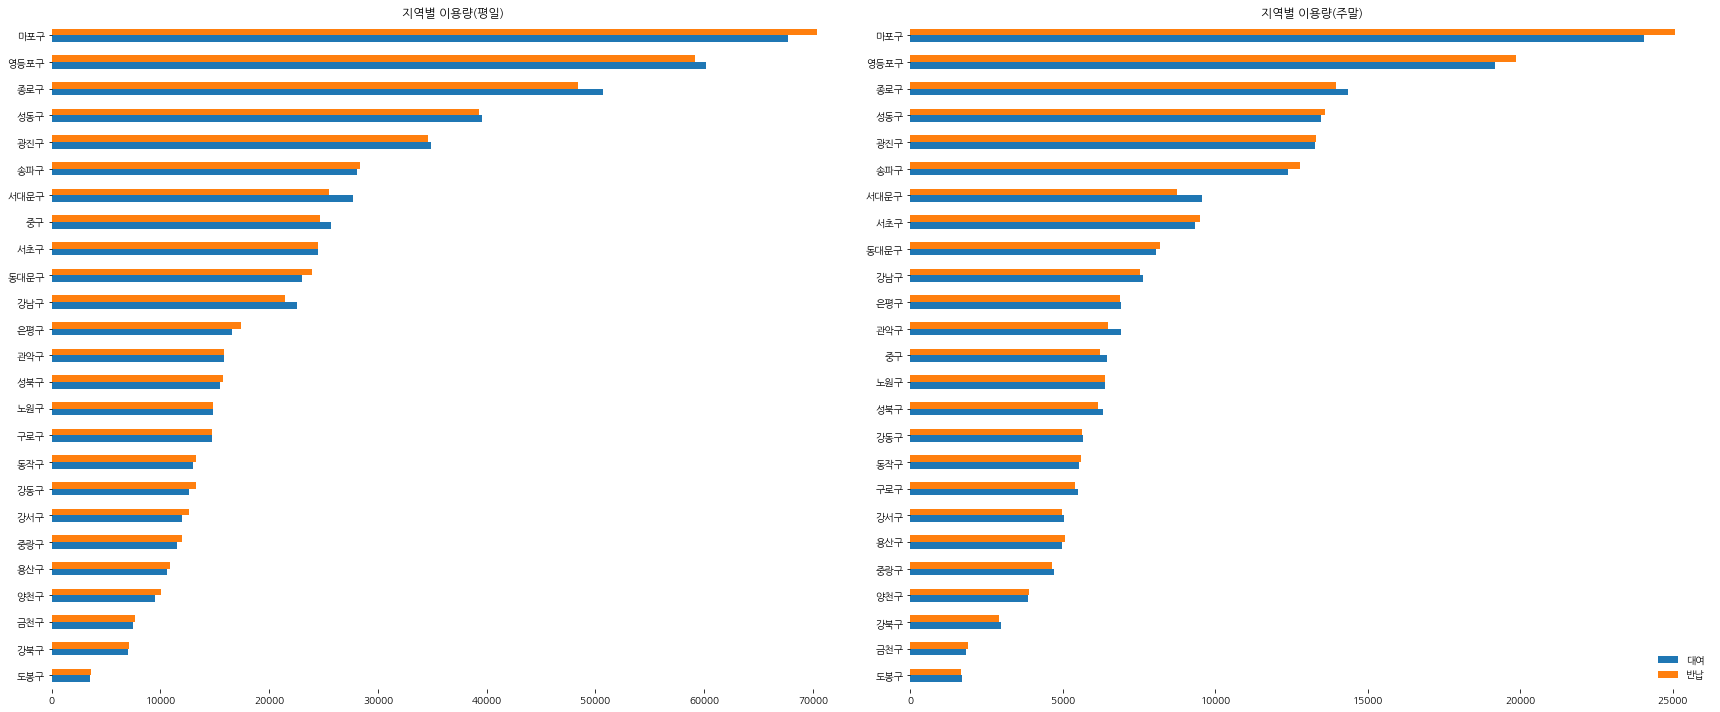

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

weekday = set(range(0, 5))
weekend = set(range(5, 7))

for i, (dayofweek, name) in enumerate(zip([weekday, weekend], ["평일", "주말"])):
    rental_by_region = df_stations[df_stations['대여요일'].isin(dayofweek)].groupby('대여 지역').size()
    return_by_region = df_stations[df_stations['대여요일'].isin(dayofweek)].groupby('반납 지역').size()

    use_by_region = pd.DataFrame(data={
        "대여": rental_by_region,
        "반납": return_by_region
    })
    use_by_region.sort_values("대여", ascending=True, inplace=True)

    ax = use_by_region.plot(kind='barh', rot=0, title="지역별 이용량(%s)"%name, ax=axes[i])
    plt.sca(ax)
    plt.box(False)
    plt.legend(frameon=False)

axes[0].get_legend().remove()
plt.tight_layout()
plt.show()

# 평균 이용거리, 이용시간이 높은 지역은?

## - 이동거리

### 1) 전체 분포

In [34]:
distance = df_stations['이용거리(M)']

# 0인 값 제외.
distance = distance[distance != 0]

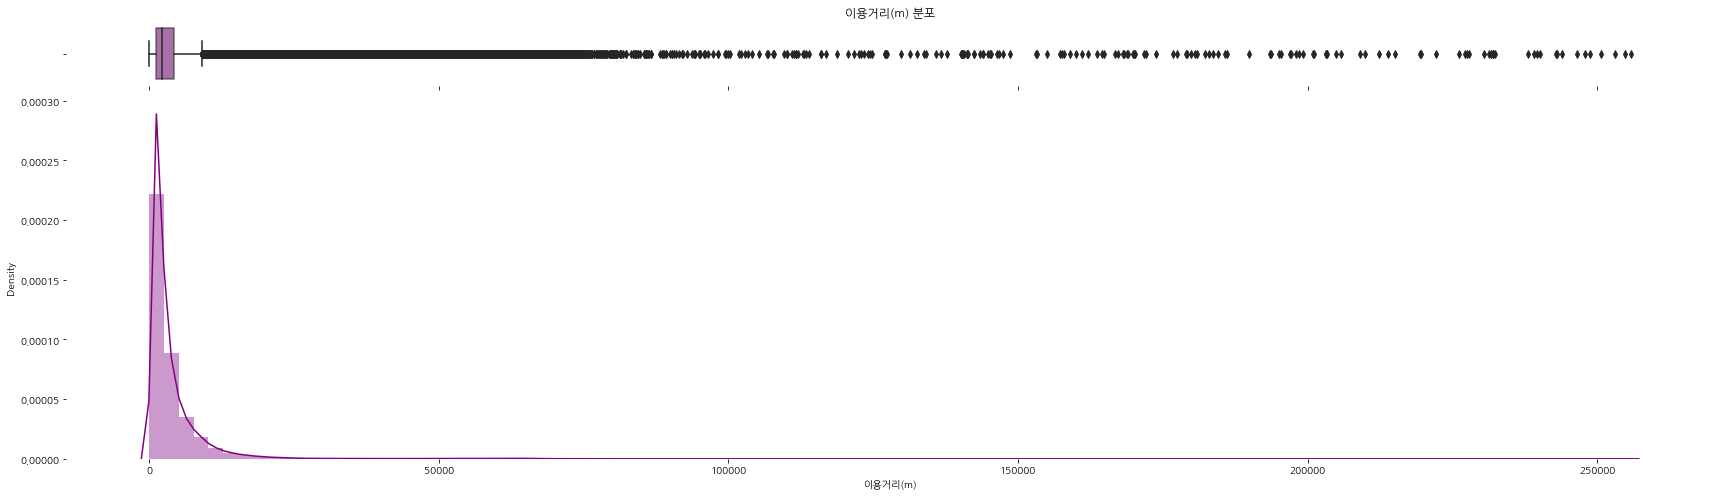

In [35]:
def draw_box_distplot(series, title, xlabel, axvline=False, color='C0', bins=100):
    # Cut the window in 2 parts
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(24, 7))

    # Add a graph in each part
    sns.boxplot(series, ax=ax_box, boxprops={'alpha':0.6}, color=color)
    sns.distplot(series, ax=ax_hist, color=color, bins=bins)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')

    plt.sca(ax_box)
    plt.box(False)
    plt.title(title)
    plt.sca(ax_hist)
    plt.box(False)
    plt.xlabel(xlabel)
    
    if axvline:
        plt.axvline(series.mean(), color='green')
        plt.axvline(series.value_counts().idxmax(), color='red')
        plt.axvline(series.median(), color='blue')
    
    plt.tight_layout()
    plt.show()
    
draw_box_distplot(distance, "이용거리(m) 분포", "이용거리(m)", color='purple')

In [38]:
def remove_outlier(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    series_out = series.loc[(series > fence_low) & (series < fence_high)]
    return series_out

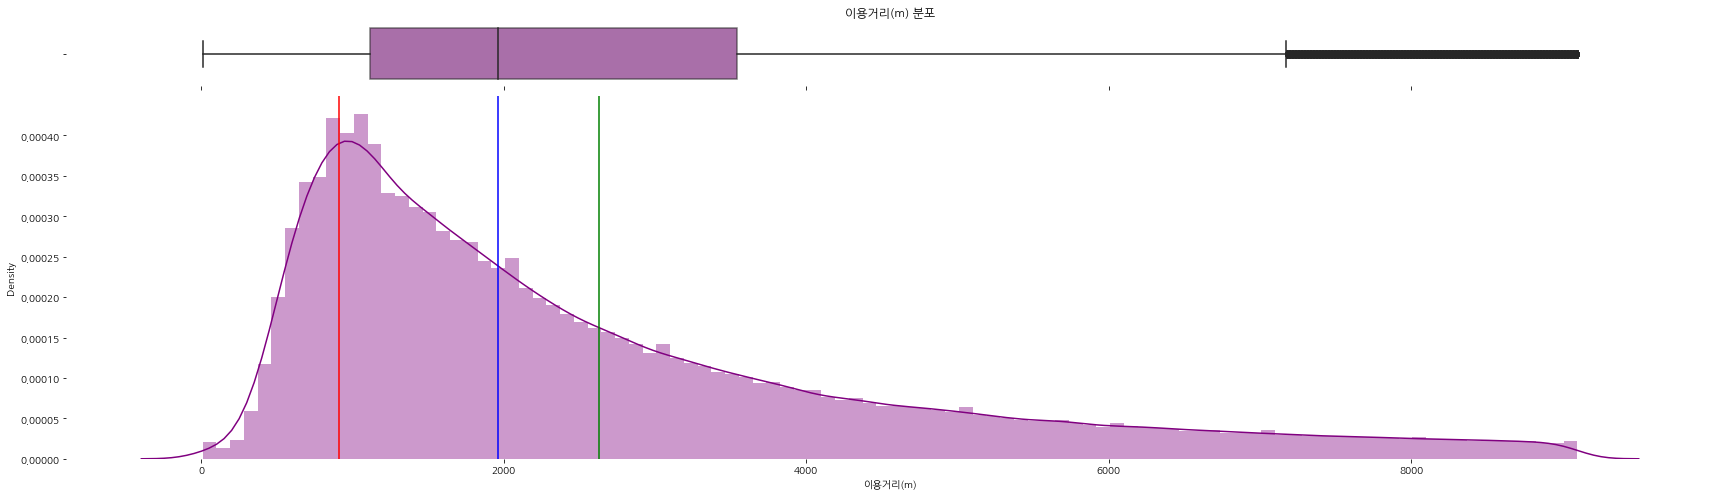

In [39]:
distance = remove_outlier(distance)

draw_box_distplot(distance, "이용거리(m) 분포", '이용거리(m)', axvline=True, color='purple')

In [40]:
print("최빈값: %dm" %distance.value_counts().idxmax())
print("중간값: %dm" %distance.median())
print("절사평균(5~95%%): %dm" %distance.mean())

최빈값: 910m
중간값: 1960m
절사평균(5~95%): 2628m


### 2) 지역별 평균 이용거리

In [41]:
distance = df_stations['이용거리(M)']

# 0인 값 제외.
distance = distance[distance != 0]